In [1]:
%matplotlib widget

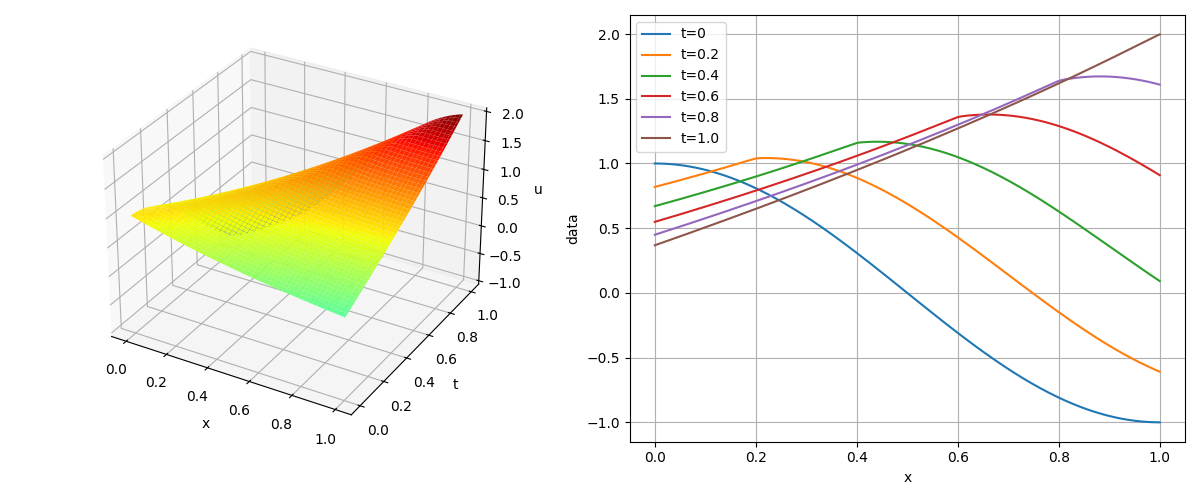

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.loadtxt("out_p.txt")
nt, nx = data.shape
x = np.linspace(0, 1, nx)
t = np.linspace(0, 1, nt)
T, X = np.meshgrid(t, x, indexing='ij')

#3D
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(T, X, data, cmap='jet')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u')

#2D
ax2 = fig.add_subplot(1, 2, 2)
for time_val in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    idx = int(time_val * (nt - 1))  # индекс ближайшего времени
    ax2.plot(x, data[idx, :], label=f't={time_val}')

ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('data')
ax2.legend()
plt.tight_layout()
plt.show()

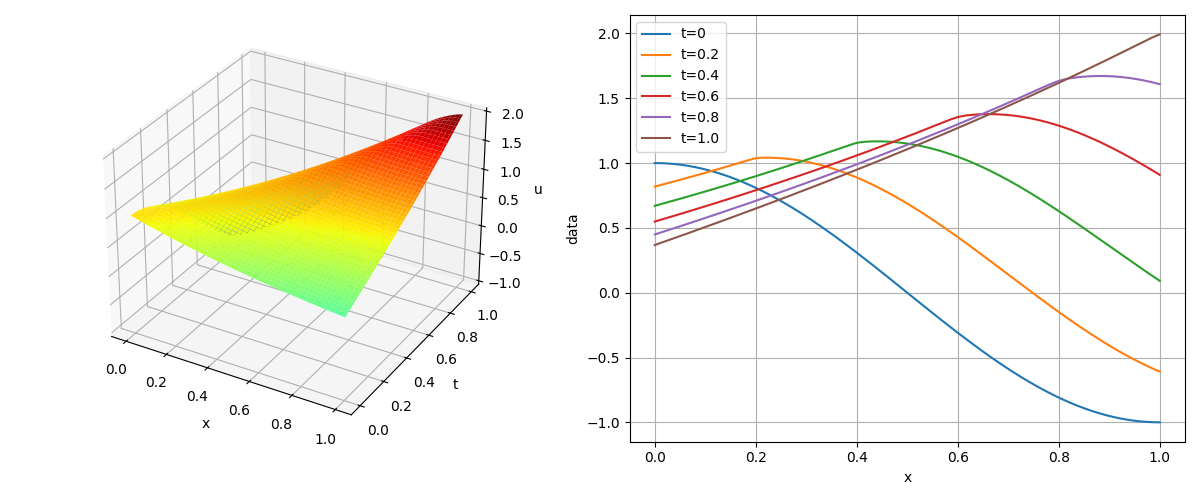

In [3]:
data = np.loadtxt("out_s.txt")
nt, nx = data.shape
x = np.linspace(0, 1, nx)
t = np.linspace(0, 1, nt)
T, X = np.meshgrid(t, x, indexing='ij')

#3D
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(T, X, data, cmap='jet')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u')

#2D
ax2 = fig.add_subplot(1, 2, 2)
for time_val in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    idx = int(time_val * (nt - 1))  # индекс ближайшего времени
    ax2.plot(x, data[idx, :], label=f't={time_val}')

ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel('data')
ax2.legend()
plt.tight_layout()
plt.show()

In [4]:
import re
regexp_param = r'Test\s+with\s+parameters:\s+50000\s+(\d+)'
regexp_p = r'Elapsed\s+calculation\s+time\s+for\s+rank:\s+1\s+-\s+(\d+.\d+)\s+seconds'
filename_p = 'output_p.log'
regexp_s = r'Elapsed\s+time:\s+(\d+.\d+)\s+seconds'
filename_s = 'output_s.log'

def parse_log_file(filename, regexp):
    with open(filename, 'r') as f:
        log_content = f.read()
        
    pattern = re.compile(
        regexp,
        re.DOTALL
    )
    
    results = []
    for match in pattern.finditer(log_content):
        elapsed_time = float(match.group(1))
        results.append(elapsed_time)
    
    return results

results_p = parse_log_file(filename_p, regexp_p)
results_s = parse_log_file(filename_s, regexp_s)[:len(results_p)]
paramRange = parse_log_file(filename_s, regexp_param)[:len(results_p)]

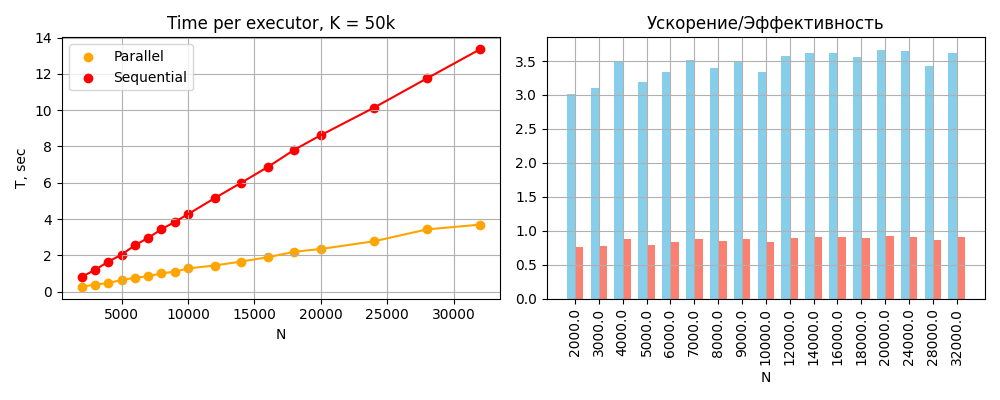

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Time per executor, K = 50k')
plt.plot(paramRange, results_p, color='orange')
plt.scatter(paramRange, results_p, label='Parallel', color='orange')
plt.plot(paramRange, results_s, color='red')
plt.scatter(paramRange, results_s, label='Sequential', color='red')
plt.xlabel("N")
plt.ylabel("T, sec")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
boost = np.array(results_s)/np.array(results_p)
efficiency = boost / 4

x = np.arange(len(paramRange))  # позиции для столбцов
width = 0.35  # ширина столбцов

bars1 = plt.bar(x - width/2, boost, width, label='Эффективность', color='skyblue')
plt.xlabel('N')

bars2 = plt.bar(x + width/2, efficiency, width, label='Время (мс)', color='salmon')

plt.xticks(x, labels=paramRange, rotation=90)
plt.title('Ускорение/Эффективность')
plt.grid()

plt.tight_layout()
plt.show()